<a href="https://colab.research.google.com/github/tisianewembou/ai-skill-showcaseTisianeW/blob/feature%2FTisiane/tisiane_showcase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dolphin image loaded successfully YAY!


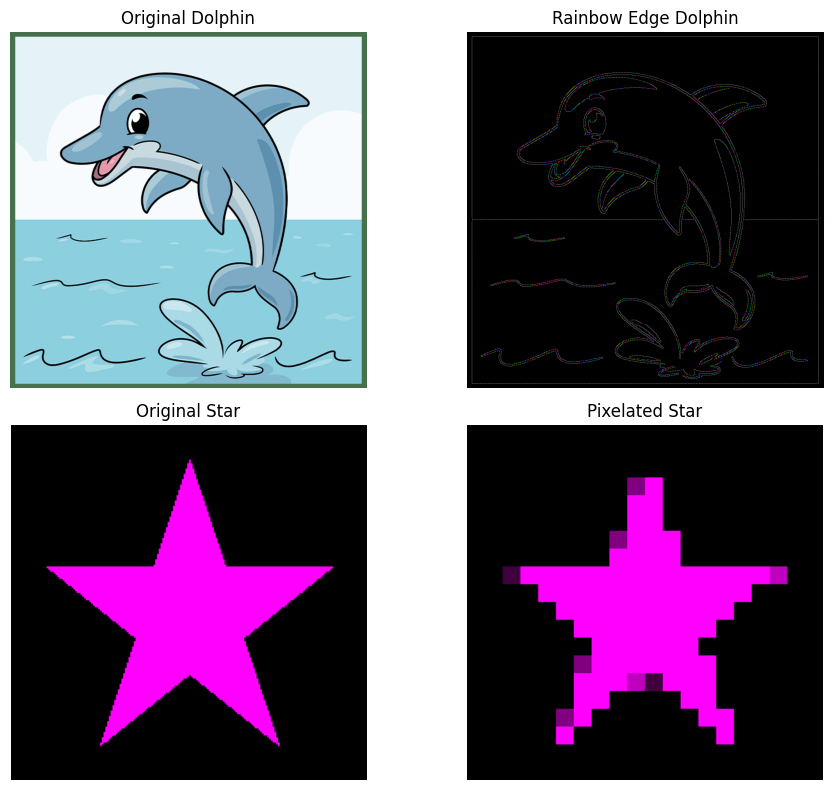

In [18]:
# AI Skill Showcase - Dolphin edition ( my favourite animal)
# Goal: Load a dolphin image, apply  rainbow edge transformation, display original and transformed images side-by-side.

# Importing needed libraries:

# OpenCV for image loading + processing + transformations
import cv2 as cv
# numpy for array manipulation + handling image data
import numpy as np
# matplotlib.pyplot for displaying images
import matplotlib.pyplot as plt


# Step 1: Load the dolphin image ( BGR format)
img = cv.imread("dolphin.png")

# Check if the image loaded correctly
if img is None:
    raise FileNotFoundError("File not found! Make sure it's in your repo folder.")
else:
    print("Dolphin image loaded successfully YAY!")



#Step 1.1: Load a shape (synthetic)
img2 = np.zeros((200, 200, 3), dtype='uint8')  # Blank image

# Define star points
star_points = np.array([[100, 20], [120, 80], [180, 80],
                        [130, 120], [150, 180], [100, 140],
                        [50, 180], [70, 120], [20, 80], [80, 80]], np.int32)

star_points = star_points.reshape((-1, 1, 2))

# Draw filled star
# Magenta (my favourite color)
cv.fillPoly(img2, [star_points], (255, 0, 255))


# Step 2: Apply transformation ( rainbow edges to dolphin )


# Convert the original image to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


# Detect edges using Canny algorithm
# Adjust thresholds for better edge detection
edges = cv.Canny(gray, 100, 200)


# Create a blank image to hold the rainbow-colored edges
edges_colored = np.zeros_like(img)


# Define a repeating pattern of colors for the edges
colors = [(255, 0, 0),  # Red
          (0, 255, 0),  # Green
          (0, 0, 255)]  # Blue


# Map each edge pixel to a color based on its position
for i in range(edges.shape[0]):      # Each row
    for j in range(edges.shape[1]):  # Each col
        if edges[i, j] != 0:         # Only modify pixels that are part of an edge
            edges_colored[i, j] = colors[(i + j) % len(colors)]  # Cycle through red, green, blue

# Step 2.1: Transformation to the star (pixelated effect)

# Copy the star image
pixel_star = img2.copy()

# Define scale for pixelation (smaller scale = bigger pixels)
scale = 0.1

# Resize down
small = cv.resize(pixel_star, (int(pixel_star.shape[1]*scale), int(pixel_star.shape[0]*scale)), interpolation=cv.INTER_LINEAR)

# Resize back up to original size (pixelated look)
pixel_star = cv.resize(small, (pixel_star.shape[1], pixel_star.shape[0]), interpolation=cv.INTER_NEAREST)

# Step 3: Display original and transformed side-by-side

# Create a new figure for plotting with width and height
plt.figure(figsize=(10, 8))

# Dolphin original
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Original Dolphin")
plt.axis("off")

# Dolphin with rainbow edges
plt.subplot(2, 2, 2)
plt.imshow(cv.cvtColor(edges_colored, cv.COLOR_BGR2RGB))
plt.title("Rainbow Edge Dolphin")
plt.axis("off")

# Star original
plt.subplot(2, 2, 3)
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.title("Original Star")
plt.axis("off")

# Star pixelated
plt.subplot(2, 2, 4)
plt.imshow(cv.cvtColor(pixel_star, cv.COLOR_BGR2RGB))
plt.title("Pixelated Star")
plt.axis("off")

# Adjust spacing
plt.tight_layout()

# Show the plot
plt.show()




